# Week 6-11 한글 텍스트 군집 분석

In [1]:
# 데이터 읽기

import os
import pandas as pd

os.chdir('C:\jwkim\lecture\LG전자_22')
review_df=pd.read_csv("thinq_review_result.csv")

review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  
0      [['추가', '정보', '등록', '앱', '설정', '충분하다', '굳이', '...  
1      [['그냥', '엘지', '제품', '리모컨', '사용', '정신', '건강', '...  
2      [['퓨리', '케어', '공기청정기', '단', '짜다', '사용', '중', '...  
3      [['에너지', '모니터링', '지난달', '대비', '용량', '전달', '달',...  
4      [['LG', '옙', '서비스', '작동', '기능', '자다', '안되다', '...  
...                                                  ...  
11374                                           [['좋다']]  
11375                                           [['좋다']]  
11376                                            [['굿']]  
11377                                            [['굿']]  
11378                                           [['좋다']]  

[11379 rows x 5 columns]

In [3]:
def one_word_list(sent_list):
    one_list=[]
    for sentence in sent_list:
        one_list.extend(sentence)
    return(one_list)

In [4]:
review_df['comment_n']=review_df['comment_n'].apply(lambda x: one_word_list(eval(x)))
review_df['comment_n']

0        [추가, 정보, 등록, 앱, 설정, 충분하다, 굳이, 기기, 화면, 상단, 배치, ...
1        [그냥, 엘지, 제품, 리모컨, 사용, 정신, 건강, 좋다, 앱, 제품, 삭제, 제...
2        [퓨리, 케어, 공기청정기, 단, 짜다, 사용, 중, 어플, 공기청정기, 수치, 표...
3        [에너지, 모니터링, 지난달, 대비, 용량, 전달, 달, 바뀌다, 보기, 달, 시작...
4        [LG, 옙, 서비스, 작동, 기능, 자다, 안되다, 짜증, 나다, 통신사, 이동,...
                               ...                        
11374                                                 [좋다]
11375                                                 [좋다]
11376                                                  [굿]
11377                                                  [굿]
11378                                                 [좋다]
Name: comment_n, Length: 11379, dtype: object

In [5]:
review_df['comment_n_str']=review_df['comment_n'].apply(lambda x: " ".join(x))
review_df['comment_n_str']

0        추가 정보 등록 앱 설정 충분하다 굳이 기기 화면 상단 배치 끈질기다 개인 정보 요...
1        그냥 엘지 제품 리모컨 사용 정신 건강 좋다 앱 제품 삭제 제품 전원 차단 분 전원...
2        퓨리 케어 공기청정기 단 짜다 사용 중 어플 공기청정기 수치 표시 사라지다 좋다 보...
3               에너지 모니터링 지난달 대비 용량 전달 달 바뀌다 보기 달 시작 더 써다 흘
4        LG 옙 서비스 작동 기능 자다 안되다 짜증 나다 통신사 이동 삼성 단말기 교체 별...
                               ...                        
11374                                                   좋다
11375                                                   좋다
11376                                                    굿
11377                                                    굿
11378                                                   좋다
Name: comment_n_str, Length: 11379, dtype: object

In [6]:
# TfidfVectorizer 사용한 DTM 생성
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidfv = TfidfVectorizer(stop_words='english',ngram_range=(1,2), min_df=0.05,max_df=0.95)
tfidfv = TfidfVectorizer(stop_words='english',ngram_range=(1,2),min_df=0.005)
feature_vect=tfidfv.fit_transform(review_df['comment_n_str'])

In [7]:
feature_vect.shape

(11379, 312)

In [9]:
from sklearn.cluster import KMeans

# 10개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=10, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [10]:
print(cluster_label)
print(cluster_centers)

[9 9 4 ... 4 4 5]
[[7.64425768e-03 0.00000000e+00 2.05981830e-03 ... 2.29592599e-03
  5.69401342e-03 2.46657222e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.59325097e-03 3.20264647e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.30953032e-03 0.00000000e+00]
 ...
 [2.64792161e-04 0.00000000e+00 2.20661073e-03 ... 1.36908382e-03
  9.30573504e-03 0.00000000e+00]
 [0.00000000e+00 9.87641315e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.49383614e-03 0.00000000e+00 3.42686277e-03 ... 8.88470589e-03
  1.50752979e-02 4.92257374e-03]]


In [11]:
review_df['cluster_label'] = cluster_label
review_df.head()

date  star  like  \
0  2021년 09월 05일     1  36.0   
1  2021년 09월 06일     1  15.0   
2  2021년 09월 05일     1   8.0   
3  2021년 09월 06일     2   2.0   
4  2021년 09월 07일     1   NaN   

                                             comment  \
0  추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1  그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2  퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3  에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4  LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   

                                           comment_n  \
0  [추가, 정보, 등록, 앱, 설정, 충분하다, 굳이, 기기, 화면, 상단, 배치, ...   
1  [그냥, 엘지, 제품, 리모컨, 사용, 정신, 건강, 좋다, 앱, 제품, 삭제, 제...   
2  [퓨리, 케어, 공기청정기, 단, 짜다, 사용, 중, 어플, 공기청정기, 수치, 표...   
3  [에너지, 모니터링, 지난달, 대비, 용량, 전달, 달, 바뀌다, 보기, 달, 시작...   
4  [LG, 옙, 서비스, 작동, 기능, 자다, 안되다, 짜증, 나다, 통신사, 이동,...   

                                       comment_n_str  cluster_label  
0  추가 정보 등록 앱 설정 충분하다 굳이 기기 화면 상단 배치 끈질기다 개인 정보 요...              9  
1  그냥 엘지 제품 리모컨 사용 정신 건강 좋다 앱 제품 삭제 제품 전원 차단 분 전원...              9  
2  퓨리 케어 공기청정기 단 짜다 사용 중 어플 공기청정기 수치 표시 사라지다 좋다 보...              4  
3         에너지 모니터링 지난달 대비 용량 전달 달 바뀌다 보기 달 시작 더 써다 흘              4  
4  LG 옙 서비스 작동 기능 자다 안되다 짜증 나다 통신사 이동 삼성 단말기 교체 별...              3

In [12]:
review_df[review_df['cluster_label']==0].sort_values(by='comment_n_str')

date  star  like  \
2932   2019년 07월 04일     5   1.0   
1714   2019년 07월 31일     1   8.0   
2158   2020년 06월 16일     1   NaN   
2159   2020년 08월 14일     5   NaN   
664    2021년 05월 16일     3   9.0   
...              ...   ...   ...   
9487   2021년 01월 01일     2   NaN   
10514  2019년 10월 14일     1   NaN   
1137   2021년 07월 25일     2   5.0   
10808  2020년 03월 02일     1   3.0   
10703  2019년 07월 30일     1   NaN   

                                                 comment  \
2932                              AI 스피커랑도 연결되니 정말 편리합니다   
1714   AS110WBE 공기청정기 사용 중인데 예전에는 연결이 잘되던데 업데이트 되고서는 ...   
2158   AS110WBW 공기청정기 연결이 안되요. 동기화 60프로에서 와이파이 깜박임이 아...   
2159       이거 KT홈와이파이 특수문자때문에 연결이 안돼.. 재설치하니 연결이 되긴 하네요~   
664    LG SmartThinQ 앱 에서 광파오븐을 wifi 로 등록한 후 앱을 닫았다 새...   
...                                                  ...   
9487   휘센 듀얼에어컨을 사용중인데 밖에서 에어컨을 켜고 싶은데 연결해제라고 자주 뜨네요....   
10514  휘센 에어컨 샀는데 연결 좀 되게 해주세요...고객센터에서 댓글 관리는 전혀 안하시...   
1137   휘센에어컨 작년부터 와이파이 연결이 안되네요 tv는 연결해서 볼륨사용하고 하는데 에...   
10808  휘센 홈뷰 너무 불안정해요 연결이 잘안되요 20번 해야 한번 될까말까 제발 잘 보이...   
10703  휴대폰 브이20 엘지 2017년 휘센 왜연결안됨???스트레스 받음 안되는건 출시허지...   

                                               comment_n  \
2932                      [AI, 스피커, 도, 연결, 되다, 정말, 편리하다]   
1714   [AS, WBE, 공기청정기, 사용, 중, 예전, 연결, 자다, 되다, 업데이트, ...   
2158   [AS, WBW, 공기청정기, 연결, 돼다, 동기화, 프로, 와이파이, 깜박임, 아...   
2159   [KT, 홈, 와이파이, 특수문자, 때문, 연결, 돼다, 재, 설치, 하니, 연결,...   
664    [LG, SmartThinQ, 앱, 광파, 오븐, wi, fi, 등록, 앱, 닫다,...   
...                                                  ...   
9487   [휘센, 듀얼, 에어컨, 사용, 중, 밖, 에어컨, 켜다, 싶다, 연결, 해제, 자...   
10514  [휘센, 에어컨, 사다, 연결, 해주다, 고객, 센터, 댓글, 관리, 전혀, 보다,...   
1137   [휘센, 에어컨, 작년, 와이파이, 연결, 되다, tv, 늘다, 연결하다, 볼륨, ...   
10808  [휘센, 홈, 뷰, 불안정하다, 연결, 자다, 돼다, 한번, 되다, 말다, 제발, ...   
10703   [휴대폰, 브이, 엘지, 휘센, 연결, 되다, 스트레스, 받다, 안되다, 출시, 말다]   

                                           comment_n_str  cluster_label  
2932                              AI 스피커 도 연결 되다 정말 편리하다              0  
1714   AS WBE 공기청정기 사용 중 예전 연결 자다 되다 업데이트 되다 제품 스마트폰 ...              0  
2158      AS WBW 공기청정기 연결 돼다 동기화 프로 와이파이 깜박임 아예 사라지다 버리다              0  
2159               KT 홈 와이파이 특수문자 때문 연결 돼다 재 설치 하니 연결 되다              0  
664    LG SmartThinQ 앱 광파 오븐 wi fi 등록 앱 닫다 새롭다 실행 연결 ...              0  
...                                                  ...            ...  
9487   휘센 듀얼 에어컨 사용 중 밖 에어컨 켜다 싶다 연결 해제 자주 뜨다 에어컨 내 모...              0  
10514  휘센 에어컨 사다 연결 해주다 고객 센터 댓글 관리 전혀 보다 답변 달다 보다 내년...              0  
1137   휘센 에어컨 작년 와이파이 연결 되다 tv 늘다 연결하다 볼륨 사용 에어컨 작년 연...              0  
10808  휘센 홈 뷰 불안정하다 연결 자다 돼다 한번 되다 말다 제발 자다 보이 해주다 필요...              0  
10703               휴대폰 브이 엘지 휘센 연결 되다 스트레스 받다 안되다 출시 말다              0  

[1063 rows x 7 columns]

In [13]:
review_df[review_df['cluster_label']==1].sort_values(by='comment_n_str')

date  star  like  \
2753  2021년 01월 04일     5   NaN   
2913  2020년 03월 14일     5   NaN   
2764  2019년 11월 26일     1   NaN   
4013  2019년 09월 27일     5   NaN   
4201  2020년 07월 02일     4   NaN   
...             ...   ...   ...   
4989  2018년 10월 02일     5   NaN   
1905  2020년 04월 30일     4   NaN   
4811  2019년 02월 07일     5   NaN   
2495  2018년 12월 02일     5   NaN   
4190  2019년 10월 03일     5   NaN   

                                                comment  \
2753                     LG가전제품 쓰시면 띵큐로 연결하시면 편하고 좋습니다~   
2913                           가전제품은 엘지만 쓰는데 너무 편하고 좋아요   
2764           가전제품 좀 편하게 쓰기위하여 치고는 너무 과다한 개인정보를 요청하내요.   
4013                                      간단하고 쓰기 편하네요.   
4201                                        간편하게 보기 편해요   
...                                                 ...   
4989                                    핸드폰으로 켤수 있어 편했음   
1905  확실히 편하긴 합니다. 기기간의 통신 속도가 늦고 약간의 불안정성이 있는거 같아 별...   
4811                                     확실히 편하고 좋은거같아요   
2495            휴대폰에다가 설정해 놓으니 밖에서도 전원을 끌수도 있고 편하고 좋아요~   
4190                              휴대폰으로 편하게 관리할수 있어 좋네요   

                                              comment_n  \
2753             [LG, 가다, 전, 제품, 쓰시, 땡큐, 연결하다, 편하다, 좋다]   
2913                            [가전제품, 엘지, 쓰다, 편하다, 좋다]   
2764                 [가전제품, 편하다, 쓰기, 위, 다한, 개인, 정보, 요청]   
4013                                    [간단하다, 쓰기, 편하다]   
4201                                    [간편하다, 보기, 편하다]   
...                                                 ...   
4989                                     [핸드폰, 켜다, 편하다]   
1905  [확실하다, 편하다, 기기, 간의, 통신, 속도, 늦다, 불안, 정성, 별, 개, ...   
4811                                    [확실하다, 편하다, 좋다]   
2495               [휴대폰, 설정, 놓다, 밖, 전원, 끌, 수도, 편하다, 좋다]   
4190                                 [휴대폰, 편하다, 관리, 좋다]   

                              comment_n_str  cluster_label  
2753           LG 가다 전 제품 쓰시 땡큐 연결하다 편하다 좋다              1  
2913                      가전제품 엘지 쓰다 편하다 좋다              1  
2764              가전제품 편하다 쓰기 위 다한 개인 정보 요청              1  
4013                            간단하다 쓰기 편하다              1  
4201                            간편하다 보기 편하다              1  
...                                     ...            ...  
4989                             핸드폰 켜다 편하다              1  
1905  확실하다 편하다 기기 간의 통신 속도 늦다 불안 정성 별 개 드리다              1  
4811                            확실하다 편하다 좋다              1  
2495             휴대폰 설정 놓다 밖 전원 끌 수도 편하다 좋다              1  
4190                          휴대폰 편하다 관리 좋다              1  

[684 rows x 7 columns]

In [14]:
review_df[review_df['cluster_label']==9].sort_values(by='comment_n_str')

date  star  like  \
4589   2020년 10월 20일     1   NaN   
10843  2019년 08월 11일     3   3.0   
3495   2020년 05월 02일     1   NaN   
300    2021년 08월 03일     1   NaN   
10741  2019년 08월 04일     3   NaN   
...              ...   ...   ...   
1776   2019년 06월 11일     2   NaN   
9438   2021년 02월 17일     1   NaN   
954    2021년 03월 26일     1  57.0   
10252  2020년 02월 22일     1   NaN   
1265   2020년 09월 29일     2   NaN   

                                                 comment  \
4589      AIHC71G 스마트씽큐 허브 등록하고 사용하려는데 안되요? 해외라 그런지 어렵네요   
10843  AS181DAW 공기청정기를 사용하고 있고요, 핸드폰은 갤럭시 노트5입니다. 3단계...   
3495   E Run SsiBal 장난하나.. 매장관리하느라 시스템 으로 쫘악 깔아놓고 24시...   
300    E1009 오류는 뭔가요????? 어플로 등록해서 쓰다가 오늘 갑자기 E1009 오...   
10741  FQ17V7KWAN 이제품 와이파이모듈 내장아닌가요? 제품등록이 잘안되네요 계속실패...   
...                                                  ...   
1776   현재 서버로부터 응답없다는데 왜그런건가요 잘사용하다 오늘부터 이럽니다 다시 깔고 제...   
9438   회원가입안하고 잘쓰고있는데 강제로 회원가입시키더니 로그인하니까 등록된제품이 다 날아...   
954    회원가입 프로세스가 엉망입니다. 1.네이버 or 구글 계정으로 로긴한다. 2.제품 ...   
10252  휘센 2in1 에어컨 작년여름에 사서 제품등록하려고 들어가니 해당국가에선 제품을 등...   
1265   휴대폰 바꾸기 전에는 앱사용 잘만 되옸는데 이번에 폰바뀨고 여름이되오 써야해서 제품...   

                                               comment_n  \
4589     [AIHC, G, 스마트, 큐, 허브, 등록, 사용, 돼다, 해외, 그렇다, 어렵다]   
10843  [AS, DAW, 공기청정기, 사용, 핸드폰, 갤럭시, 노트, 단계, 등록, 시작,...   
3495   [E, Run, SsiBal, 장난, 매장, 관리, 시스템, 쫘악, 깔다, 살아가다...   
300    [E, 오류, 뭔가, 어플, 등록, 쓰다, 오늘, 갑자기, E, 오류, 뜨다, 냉장...   
10741  [FQ, V, KWAN, 제품, 와이파이, 모듈, 내장, 아니다, 제품, 등록, 자...   
...                                                  ...   
1776   [현재, 서버, 응답, 없다, 그렇다, 건가, 자다, 사용, 오늘, 이렇다, 다시,...   
9438   [회원, 가입, 자다, 쓰다, 강제, 회원, 가입, 로그인, 등록, 되다, 제품, ...   
954    [회원, 가입, 프로세스, 엉망, 네이버, or, 구글, 계정, 로그, 인하다, 제...   
10252  [휘센, in, 에어컨, 작년, 여름, 사서, 제품, 등록, 들어가다, 해당, 국가...   
1265   [휴대폰, 바꾸다, 전, 앱, 사용, 잘만, 되옸는데, 폰바뀨, 여름, 되다, 써다...   

                                           comment_n_str  cluster_label  
4589                 AIHC G 스마트 큐 허브 등록 사용 돼다 해외 그렇다 어렵다              9  
10843  AS DAW 공기청정기 사용 핸드폰 갤럭시 노트 단계 등록 시작 와이파이 해제 되다...              9  
3495   E Run SsiBal 장난 매장 관리 시스템 쫘악 깔다 살아가다 목록 날아가다 젠...              9  
300    E 오류 뭔가 어플 등록 쓰다 오늘 갑자기 E 오류 뜨다 냉장고 에어컨 공기청정기 ...              9  
10741  FQ V KWAN 제품 와이파이 모듈 내장 아니다 제품 등록 자다 안되다 계속 실패...              9  
...                                                  ...            ...  
1776   현재 서버 응답 없다 그렇다 건가 자다 사용 오늘 이렇다 다시 깔다 제품 등록 계속...              9  
9438   회원 가입 자다 쓰다 강제 회원 가입 로그인 등록 되다 제품 날아가다 제대로 못 덥...              9  
954    회원 가입 프로세스 엉망 네이버 or 구글 계정 로그 인하다 제품 등록 LG 계정 ...              9  
10252  휘센 in 에어컨 작년 여름 사서 제품 등록 들어가다 해당 국가 제품 등록 없다 전...              9  
1265   휴대폰 바꾸다 전 앱 사용 잘만 되옸는데 폰바뀨 여름 되다 써다 제품 등록 네트워크...              9  

[529 rows x 7 columns]

In [15]:
# 군집별 핵심 단어 추출하기
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (10, 312)
[[7.64425768e-03 0.00000000e+00 2.05981830e-03 ... 2.29592599e-03
  5.69401342e-03 2.46657222e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.59325097e-03 3.20264647e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.30953032e-03 0.00000000e+00]
 ...
 [2.64792161e-04 0.00000000e+00 2.20661073e-03 ... 1.36908382e-03
  9.30573504e-03 0.00000000e+00]
 [0.00000000e+00 9.87641315e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.49383614e-03 0.00000000e+00 3.42686277e-03 ... 8.88470589e-03
  1.50752979e-02 4.92257374e-03]]


In [16]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        
    return cluster_details

In [17]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('='*120)

In [19]:
feature_names = tfidfv.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=review_df,
                                  feature_names=feature_names, clusters_num=10, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['연결', '되다', '연결 되다', '자다', '안되다', '에어컨', '돼다', '와이파이', '자다 되다', '해제']
####### Cluster 1
Top features: ['편하다', '편하다 좋다', '좋다', '사용 편하다', '사용', '정말', '아주', '세상', '관리', '알다']
####### Cluster 2
Top features: ['편리하다', '편리하다 좋다', '좋다', '사용 편리하다', '사용', '아주', '정말', '기능', '매우', '차다']
####### Cluster 3
Top features: ['엘지', 'lg', '역시', '가전', '좋다', '제품', '최고', '쓰다', 'lg 제품', '가다']
####### Cluster 4
Top features: ['좋다', '기능', '되다', '없다', '쓰다', '자다', '최고', '켜다', '안되다', '알림']
####### Cluster 5
Top features: ['좋다', '진짜', '켜다', '제품', '에어컨', '어플', '감사하다', '되다', '스마트', '되어다']
####### Cluster 6
Top features: ['업데이트', '이후', '업데이트 이후', '되다', '안되다', '연결', '다시', '않다', '어플', '로그인']
####### Cluster 7
Top features: ['사용', '자다 사용', '자다', '사용 좋다', '좋다', '편리하다', '편하다', '사용 편하다', '유용하다', '사용 편리하다']
####### Cluster 8
Top features: ['good', 'lg', '편리하다', '아주', '좋다', '아주 좋다', '편하다', '그냥', '작동', '바꾸다']
####### Cluster 9
Top features: ['등록', '제품', '제품 등록', '되다', '안되다', '등록 되다', '등록 안되다',

In [20]:
# Dimension Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(feature_vect.toarray())
review_df['ftr1'] = pca_transformed[:,0]
review_df['ftr2'] = pca_transformed[:,1]

In [49]:
### Function to visualize clustering results  
import matplotlib.pyplot as plt
import numpy as np

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*','P','D','H','v','>','<','1','2','3','4']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[0])  #label
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper right'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

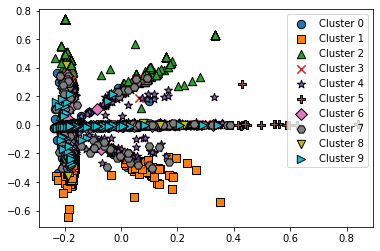

In [24]:
visualize_cluster_plot(km_cluster, review_df, 'cluster_label', iscenter=False)

In [55]:
#DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(feature_vect)

In [56]:
review_df['dbscan_cluster'] = dbscan_labels

In [57]:
review_df['dbscan_cluster'].value_counts()

 0     8123
-1     2344
 1      853
 3       10
 2        9
 4        9
 9        7
 10       5
 5        5
 7        5
 11       4
 6        3
 8        2
Name: dbscan_cluster, dtype: int64

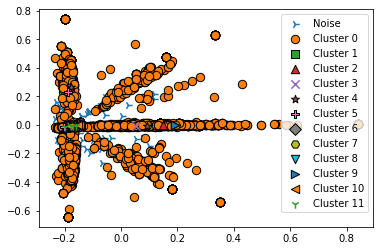

In [58]:
visualize_cluster_plot(dbscan, review_df, 'dbscan_cluster', iscenter=False)

In [64]:
review_df[review_df['dbscan_cluster']==9].sort_values(by='comment_n_str')

date  star  like  \
8707   2019년 03월 05일     5   NaN   
4801   2020년 06월 21일     5   NaN   
11106  2019년 04월 05일     1   NaN   
10265  2020년 02월 27일     5   2.0   
10643  2019년 09월 02일     4   NaN   
3083   2019년 11월 08일     5   NaN   
421    2021년 08월 09일     2   NaN   

                                              comment  \
8707                                앱이 예전과 달리 빨라져서 좋다   
4801                               예전보다 깔끔해진거 같아 좋네요~   
11106                             예전것으로 바꿔주세요 불편해요성질나   
10265                                      예전보다좋아졌읍니다   
10643               예전보다 훨씬 많이 좋아졌는데 며칠전부터 어플이 안들어가져요   
3083   예전보다 훨씬 좋아졌어요ㅎ 속도도 빨라지고요! 덕분에 삶의 질이 높아진 기분입니다~   
421                         오븐 레시피 검색이 안됩니다. 예전엔 됐었는데   

                                    comment_n                 comment_n_str  \
8707                     [앱, 예전, 달리, 빨르다, 좋다]                앱 예전 달리 빨르다 좋다   
4801                           [예전, 깔끔하다, 좋다]                    예전 깔끔하다 좋다   
11106                     [예전, 바꾸다, 불편하다, 성질]                예전 바꾸다 불편하다 성질   
10265                              [예전, 좋아지다]                       예전 좋아지다   
10643             [예전, 좋아지다, 며칠, 전, 어플, 들어가다]          예전 좋아지다 며칠 전 어플 들어가다   
3083   [예전, 좋아지다, 속도, 빨, 고요, 덕분, 삶, 높아지다, 기분]  예전 좋아지다 속도 빨 고요 덕분 삶 높아지다 기분   
421                [오븐, 레시피, 검색, 안되다, 예전, 돼다]           오븐 레시피 검색 안되다 예전 돼다   

       cluster_label      ftr1      ftr2  dbscan_cluster  
8707               4  0.193345  0.000285               9  
4801               4  0.193345  0.000285               9  
11106              4 -0.151761 -0.004080               9  
10265              4 -0.144053 -0.002893               9  
10643              4 -0.155089 -0.003581               9  
3083               4 -0.145439 -0.003559               9  
421                4 -0.169774 -0.008989               9

In [65]:
dbscan = DBSCAN(eps=0.8, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(feature_vect)

In [66]:
review_df['dbscan_cluster'] = dbscan_labels

In [67]:
review_df['dbscan_cluster'].value_counts()

 0     5989
-1     3970
 2      853
 31     199
 8       55
 9       28
 22      21
 7       19
 4       17
 15      14
 16      14
 19      14
 1       13
 25      12
 13      12
 12      11
 14      11
 11      11
 34      10
 36       9
 32       9
 18       7
 26       7
 5        6
 6        5
 23       5
 17       5
 33       5
 24       5
 10       5
 35       5
 20       5
 29       5
 21       5
 3        5
 28       5
 30       4
 27       4
Name: dbscan_cluster, dtype: int64